In [1]:
import os
from tqdm import tqdm
from itertools import chain
import pandas as pd
import numpy as np
import random, torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)


In [3]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
import colorcet as cc

In [13]:
df_label = pd.read_csv('./00_clinical_label_orignal.csv', index_col=0)
df_feature = pd.read_csv('./04_features_celltype.csv', index_col=0)

In [19]:
df_feature['cancer_type'] = df_feature.bcr_patient_barcode.map(df_label.cancer_type)

## select the SKCM cohort to analysis
dfs = df_feature[df_feature.cancer_type=='TCGA-SKCM']

In [22]:
data = dfs[dfs.columns[2:34]]

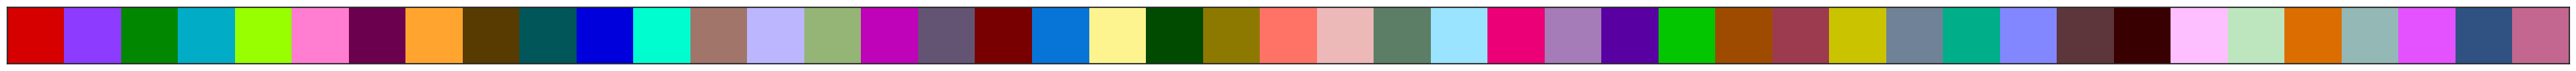

In [25]:
## generate 45-colors, each color is one celltype
palette = sns.color_palette(cc.glasbey, n_colors= len(dfs.feature_name.unique()))
sns.palplot(palette)

In [31]:
mp = PCA(n_components=2, )
c2d = mp.fit_transform(data)
df2d  = pd.DataFrame(c2d, index=dfs.index, columns = ['x', 'y'])
df2d = df2d.join(dfs[['feature_name', 'cancer_type']])

In [32]:
df2d.head()

,x,y,feature_name,cancer_type
TCGA-3N-A9WB$$Adipocyte,-0.329999,-0.304481,Adipocyte,TCGA-SKCM
TCGA-3N-A9WC$$Adipocyte,-0.054951,-0.229268,Adipocyte,TCGA-SKCM
TCGA-3N-A9WD$$Adipocyte,-0.239442,-0.308632,Adipocyte,TCGA-SKCM
TCGA-BF-A1PU$$Adipocyte,-0.420275,-0.319218,Adipocyte,TCGA-SKCM
TCGA-BF-A1PV$$Adipocyte,-0.059190,-0.251928,Adipocyte,TCGA-SKCM


/tmp/ipykernel_246414/3189415370.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df2d.groupby('feature_name').mean()


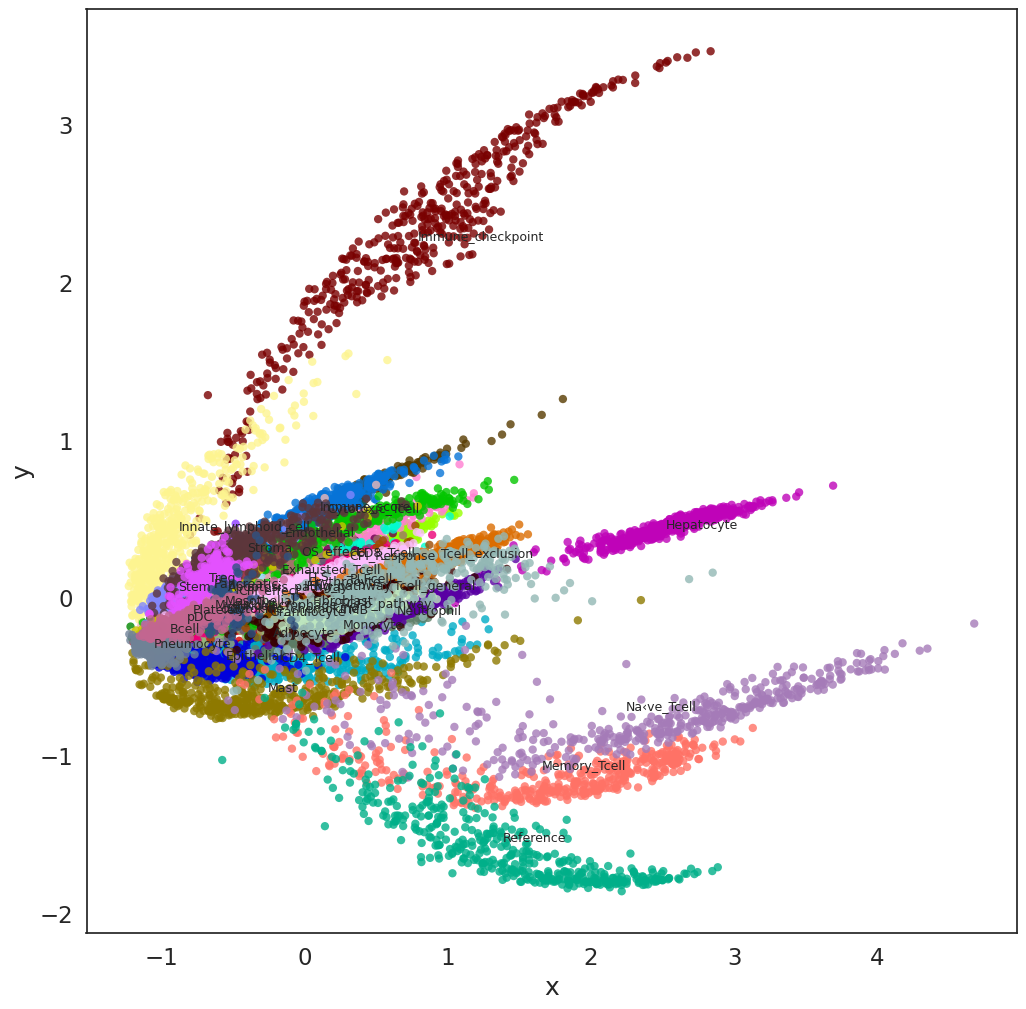

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'feature_name',  alpha = 0.8, linewidth=0.0, sizes = 0.001,
                palette=palette, ax=ax, legend=False)

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6),
#           ncol=3, fancybox=True, shadow=True)

mean = df2d.groupby('feature_name').mean()
for name in mean.index:
    s = mean.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':9})

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')


In [34]:
mp = UMAP(n_components=2 , min_dist=0.8, n_neighbors = 30, verbose=1) #, min_dist=1, , min_dist=0.8
c2d = mp.fit_transform(data)
df2d  = pd.DataFrame(c2d, index=dfs.index, columns = ['x', 'y'])
df2d = df2d.join(dfs[['feature_name', 'cancer_type']])

UMAP(min_dist=0.8, n_neighbors=30, verbose=1)
Tue Mar  5 10:24:01 2024 Construct fuzzy simplicial set
Tue Mar  5 10:24:01 2024 Finding Nearest Neighbors
Tue Mar  5 10:24:01 2024 Building RP forest with 12 trees
Tue Mar  5 10:24:06 2024 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	Stopping threshold met -- exiting after 2 iterations
Tue Mar  5 10:24:21 2024 Finished Nearest Neighbor Search
Tue Mar  5 10:24:24 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Mar  5 10:24:59 2024 Finished embedding


/tmp/ipykernel_246414/3389012704.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df2d.groupby('feature_name').mean()


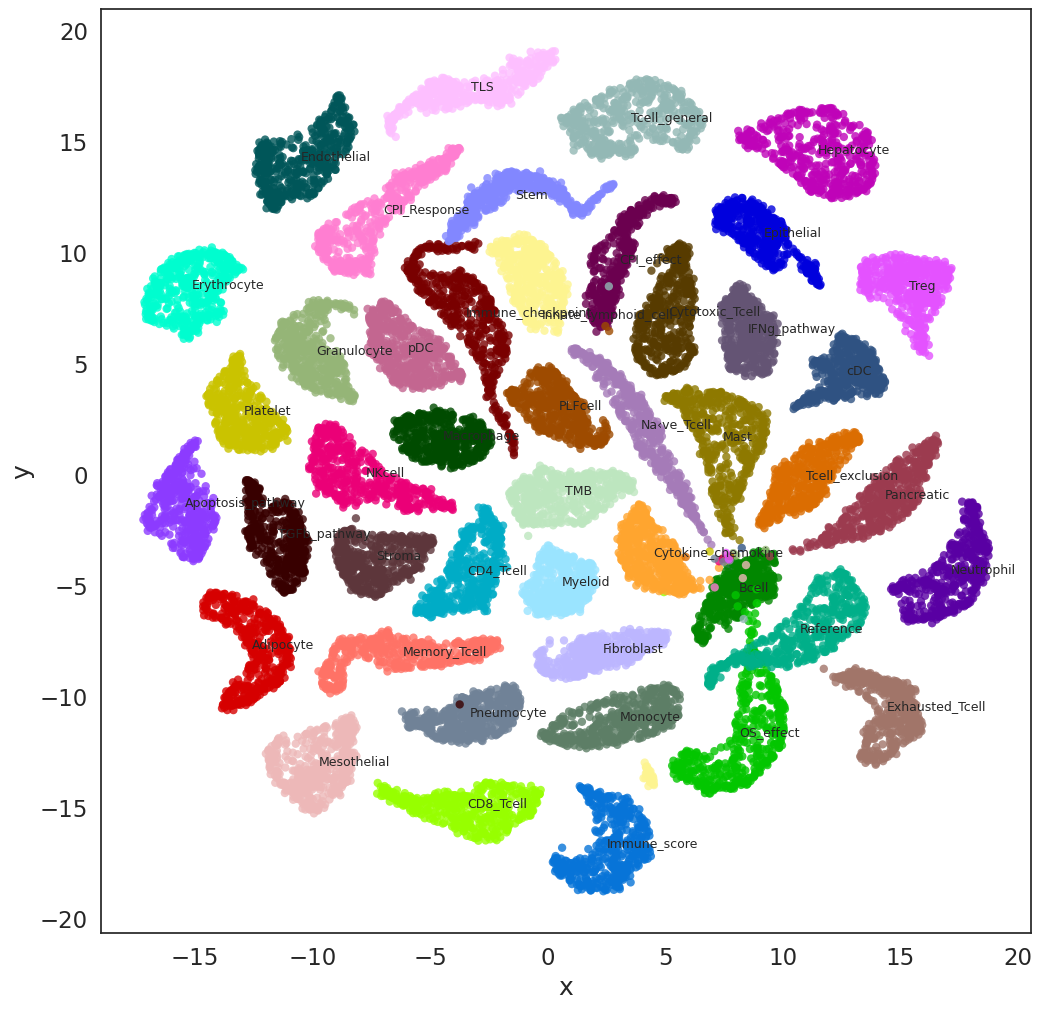

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'feature_name',  alpha = 0.8, linewidth=0.0, sizes = 0.001,
                palette=palette, ax=ax, legend=False)

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6),
#           ncol=3, fancybox=True, shadow=True)

mean = df2d.groupby('feature_name').mean()
for name in mean.index:
    s = mean.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':9})

ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')

In [36]:
mp = TSNE(n_components=2 ) #, min_dist=1, , min_dist=0.8
c2d = mp.fit_transform(data)
df2d  = pd.DataFrame(c2d, index=dfs.index, columns = ['x', 'y'])
df2d = df2d.join(dfs[['feature_name', 'cancer_type']])

/tmp/ipykernel_246414/2978722038.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df2d.groupby('feature_name').mean()


Text(0, 0.5, 't-SNE2')

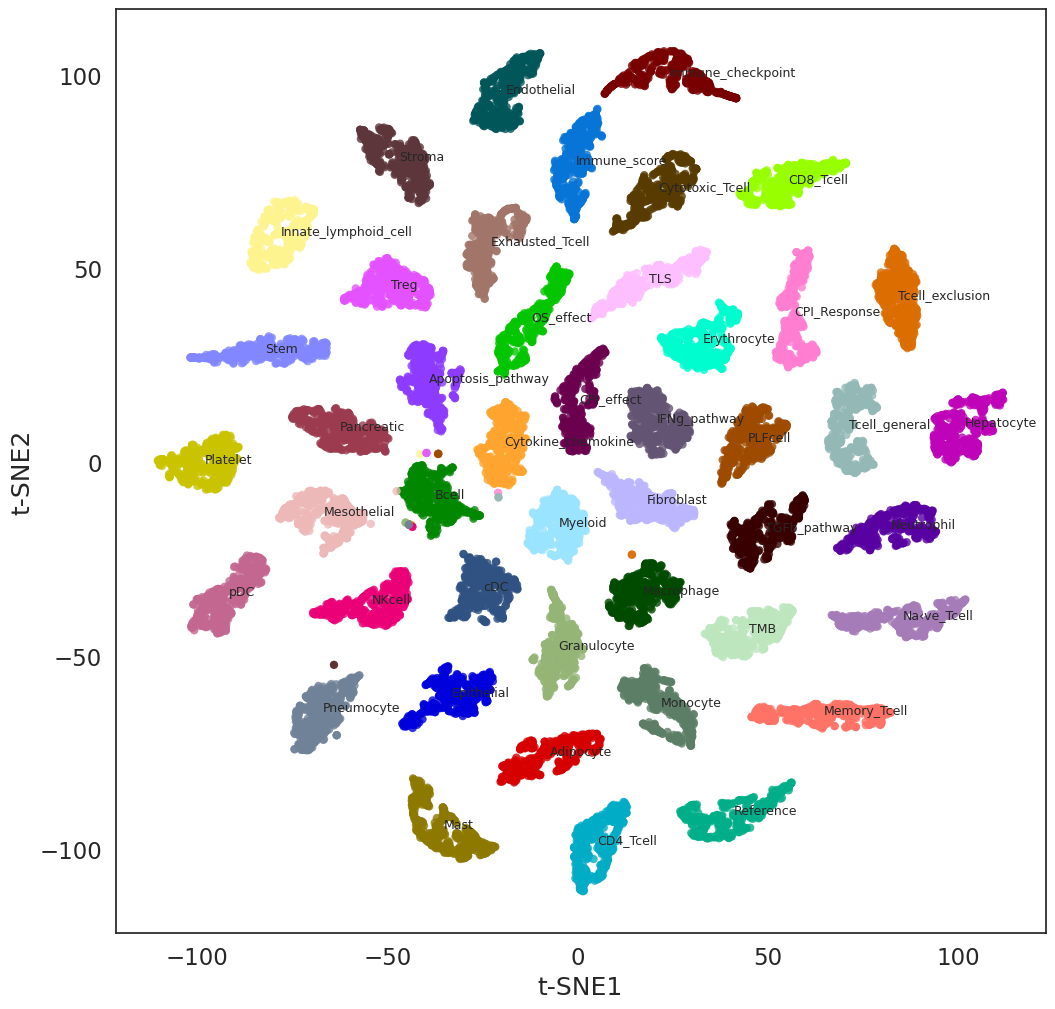

In [37]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'feature_name',  alpha = 0.8, linewidth=0.0, sizes = 0.001,
                palette=palette, ax=ax, legend=False)

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6),
#           ncol=3, fancybox=True, shadow=True)

mean = df2d.groupby('feature_name').mean()
for name in mean.index:
    s = mean.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':9})

ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')